In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('input/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


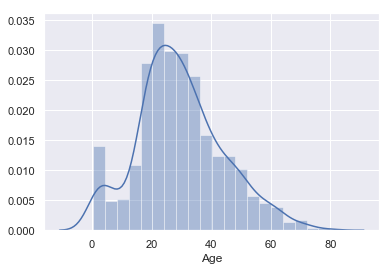

In [14]:
sns.distplot(df[df['Age'].isnull() == False]['Age'])

Age seems to be mostly evenly distributed, with average around 30, with a large peak around age 0

In [138]:
print(f"Average age: {df[df['Age'].isnull() == False]['Age'].mean()}")

Average age: 29.69911764705882


In [142]:
print('Number of passengers with very small age:')
df[df['Age'].isnull() == False]['Age'].value_counts().sort_index()[:10]

Number of passengers with very small age:


0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      7
2.00     10
3.00      6
4.00     10
5.00      4
6.00      3
7.00      3
8.00      4
9.00      8
10.00     2
Name: Age, dtype: int64

Ages < 1 year do seem a little strange since it's not whole numbers, but it could be that it was in months (see below). For now leaving as is

In [155]:
df[df['Age'].isnull() == False]['Age'].value_counts().sort_index()[:0.99].index.values * 12

array([ 5.04,  8.04,  9.  ,  9.96, 11.04])

In [18]:
df['No age'] = df['Age'].isnull()
df['No age'].value_counts()

False    714
True     177
Name: No age, dtype: int64

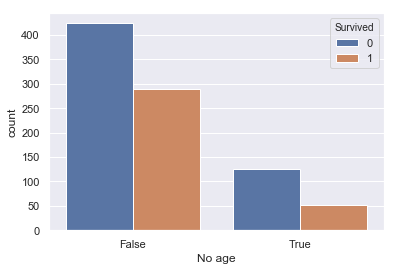

In [43]:
sns.countplot(data=df, hue='Survived', x='No age') 

In [37]:
print(f"Fraction survived without age: {df[(df['Survived']==1) & (df['No age']==True)]['Survived'].count() / df[df['No age']==True]['Survived'].count()}")

Percent survived without age: 0.2937853107344633


In [40]:
print(f"Fraction survived with age: {df[(df['Survived']==1) & (df['No age']==False)]['Survived'].count() / df[df['No age']==False]['Survived'].count()}")

Fraction survived with age: 0.4061624649859944


Seems that there is difference betwen survival rate and whether age exists or not, passengers with age have higher survival rate (perhaps due to the class below)

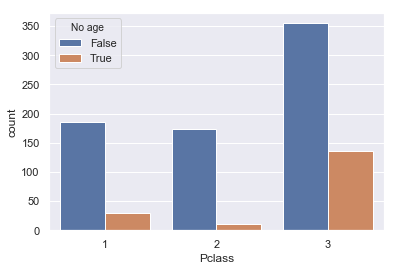

In [47]:
sns.countplot(data=df, x='Pclass', hue='No age') 

In [54]:
for cl in [1,2,3]:
    print(f"Fraction class {cl} without age: " 
          f"{round(df[(df['Pclass']==cl) & (df['No age']==True)]['Survived'].count() / df[df['Pclass']==cl]['Survived'].count(), 2)} "
          f"({df[(df['Pclass']==cl) & (df['No age']==True)]['Survived'].count()}"
          f"/{df[df['Pclass']==cl]['Survived'].count()})")

Fraction class 1 without age: 0.14 (30/216)
Fraction class 2 without age: 0.06 (11/184)
Fraction class 3 without age: 0.28 (136/491)


Seems that larger percentage of passengers from class 3 have missing age, but also some in class 1, very little in class 2

In [115]:
def get_title(full_name):
    return full_name.split(',')[1].split('.')[0].strip()

In [116]:
df[df['No age']==True]['Name'].apply(get_title).value_counts()

Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: Name, dtype: int64

In [117]:
df[df['No age']==False]['Name'].apply(get_title).value_counts()

Mr              398
Miss            146
Mrs             108
Master           36
Rev               6
Dr                6
Major             2
Mlle              2
Col               2
Jonkheer          1
Lady              1
Capt              1
Don               1
Mme               1
Sir               1
Ms                1
the Countess      1
Name: Name, dtype: int64

It seems promising to learn better average age from title

In [118]:
def has_title(title, full_name):
    #print(f'Comparing "{title}" and "{get_title(full_name)}"')
    return (title == get_title(full_name))

In [131]:
for title in df[df['No age']==True]['Name'].apply(get_title).value_counts().index:
    print(f"{title.ljust(8)} num  people: {df[df['No age']==False]['Name'].apply(get_title).value_counts()[title]}, "
        f"{title.ljust(8)} average age: {round(df[(df['No age']==False) & (df['Name'].apply(lambda name: has_title(title, name)))]['Age'].mean())}")

Mr       num  people: 398, Mr       average age: 32
Miss     num  people: 146, Miss     average age: 22
Mrs      num  people: 108, Mrs      average age: 36
Master   num  people: 36, Master   average age: 5
Dr       num  people: 6, Dr       average age: 42


This could be a basis for filling age based not on general average but on specifics per title

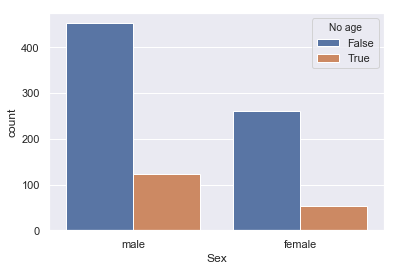

In [132]:
sns.countplot(data=df, x='Sex', hue='No age') 

In [134]:
for sex in ['male', 'female']:
    print(f"Fraction sex {sex} without age: " 
          f"{round(df[(df['Sex']==sex) & (df['No age']==True)]['Survived'].count() / df[df['Sex']==sex]['Survived'].count(), 2)} "
          f"({df[(df['Sex']==sex) & (df['No age']==True)]['Survived'].count()}"
          f"/{df[df['Sex']==sex]['Survived'].count()})")

Fraction sex male without age: 0.21 (124/577)
Fraction sex female without age: 0.17 (53/314)


Conclusion: can't use **Sex** to predict age

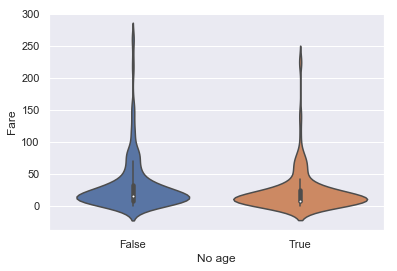

In [136]:
sns.violinplot(data=df[df['Fare'] < 300], y='Fare', x='No age') 

Conclusion: can't use **Fare** to predict age

## Check connection between average **Age** of title and class

In [166]:
for title in df[df['No age']==True]['Name'].apply(get_title).value_counts().index:
    if title != 'Dr':
        for cl in [1,2,3]:
            print(f"{title.ljust(12)} class {cl} num  people: {df[(df['No age']==False) & (df['Pclass']==cl)]['Name'].apply(get_title).value_counts()[title]}, "
                f"average age: {round(df[(df['No age']==False) & (df['Pclass']==cl) & (df['Name'].apply(lambda name: has_title(title, name)))]['Age'].mean())}")
    print(f"{title.ljust(8)} all classes num  people: {df[df['No age']==False]['Name'].apply(get_title).value_counts()[title]}, "
            f"average age: {round(df[(df['No age']==False) & (df['Name'].apply(lambda name: has_title(title, name)))]['Age'].mean())}")
    print('----------------')

Mr           class 1 num  people: 87, average age: 42
Mr           class 2 num  people: 82, average age: 33
Mr           class 3 num  people: 229, average age: 29
Mr       all classes num  people: 398, average age: 32
----------------
Miss         class 1 num  people: 45, average age: 30
Miss         class 2 num  people: 32, average age: 22
Miss         class 3 num  people: 69, average age: 16
Miss     all classes num  people: 146, average age: 22
----------------
Mrs          class 1 num  people: 34, average age: 41
Mrs          class 2 num  people: 41, average age: 34
Mrs          class 3 num  people: 33, average age: 34
Mrs      all classes num  people: 108, average age: 36
----------------
Master       class 1 num  people: 3, average age: 5
Master       class 2 num  people: 9, average age: 2
Master       class 3 num  people: 24, average age: 5
Master   all classes num  people: 36, average age: 5
----------------
Dr       all classes num  people: 6, average age: 42
----------------


It's very useful to predict age to also look at class, and not only at title.  However, some classes are more problematic, like **Master** (where there isn't enough info, and not worth looking at class), and **Dr** (where too few observations, don't have for all classes). Therefore:
- Look at both title and class: **Mr**, **Miss**, **Mrs**
- Look only at title: **Master**, **Dr**

## Check that in test there is no category we didn't discuss

In [167]:
test = pd.read_csv('input/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [171]:
test[test['Age'].isnull()]['Name'].apply(get_title).value_counts()

Mr        57
Miss      14
Mrs       10
Master     4
Ms         1
Name: Name, dtype: int64

The only problematic category in **test** is **Ms**, can treat same as **Mrs**

## Dry run of replacement of age in train

In [276]:
train = df.copy()
train['Age'].value_counts(dropna=False).head()

NaN     177
24.0     30
22.0     27
18.0     26
28.0     25
Name: Age, dtype: int64

In [277]:
train['Title'] = train['Name'].apply(get_title)

In [278]:
for title in ['Mr', 'Miss', 'Mrs']:
    for cl in [1,2,3]:
        average = train[(train['Title'] == title) & (train['Pclass']==cl)]['Age'].mean()
        std = train[(train['Title'] == title) & (train['Pclass']==cl)]['Age'].std()
        print(f'Average title {title} class {cl}: {round(average)}, std: {round(std,2)}')

Average title Mr class 1: 42, std: 14.15
Average title Mr class 2: 33, std: 11.85
Average title Mr class 3: 29, std: 10.49
Average title Miss class 1: 30, std: 12.85
Average title Miss class 2: 22, std: 13.37
Average title Miss class 3: 16, std: 9.7
Average title Mrs class 1: 41, std: 12.64
Average title Mrs class 2: 34, std: 10.32
Average title Mrs class 3: 34, std: 10.03


In [279]:
for title in ['Mr', 'Miss', 'Mrs']:
    for cl in [1,2,3]:
        average = train[(train['No age']==False) & (train['Title'] == title) & (train['Pclass']==cl)]['Age'].mean()
        print(f"Replacing title {title} in class {cl} age with {average}")
        train.loc[(train['No age']==True) & (train['Pclass']==cl) & (train['Title'] == title),'Age'] = average

Replacing title Mr in class 1 age with 41.58045977011494
Replacing title Mr in class 2 age with 32.76829268292683
Replacing title Mr in class 3 age with 28.724890829694324
Replacing title Miss in class 1 age with 30.0
Replacing title Miss in class 2 age with 22.390625
Replacing title Miss in class 3 age with 16.1231884057971
Replacing title Mrs in class 1 age with 40.88235294117647
Replacing title Mrs in class 2 age with 33.68292682926829
Replacing title Mrs in class 3 age with 33.515151515151516


In [280]:
for title in ['Master', 'Dr']:
    average = train[(train['No age']==False) & (train['Title'] == title)]['Age'].mean()
    std = train[(train['No age']==False) & (train['Title'] == title)]['Age'].std()
    print(f"Replacing title {title} age with {average}, std: {round(std,2)}")
    train.loc[(train['No age']==True) & (train['Title'] == title),'Age'] = average

Replacing title Master age with 4.574166666666667, std: 3.62
Replacing title Dr age with 42.0, std: 12.02


In [281]:
train['Age'].value_counts(dropna=False).head()

28.724891    90
16.123188    33
24.000000    30
22.000000    27
30.000000    26
Name: Age, dtype: int64

In [284]:
for title in ['Mr', 'Miss', 'Mrs']:
    for cl in [1,2,3]:
        average = train[(train['Title'] == title) & (train['Pclass']==cl)]['Age'].mean()
        std = train[(train['Title'] == title) & (train['Pclass']==cl)]['Age'].std()
        print(f'Average title {title} class {cl}: {round(average)}, std: {round(std,2)}')
for title in ['Master', 'Dr']:
    average = train[train['Title'] == title]['Age'].mean()
    std = train[train['Title'] == title]['Age'].std()
    print(f"Average title {title} age with {round(average)}, std: {round(std,2)}")
    train.loc[(train['No age']==True) & (train['Title'] == title),'Age'] = average

Average title Mr class 1: 42, std: 12.74
Average title Mr class 2: 33, std: 11.24
Average title Mr class 3: 29, std: 8.88
Average title Miss class 1: 30, std: 12.71
Average title Miss class 2: 22, std: 12.96
Average title Miss class 3: 16, std: 7.96
Average title Mrs class 1: 41, std: 11.34
Average title Mrs class 2: 34, std: 10.32
Average title Mrs class 3: 34, std: 8.86
Average title Master age with 5, std: 3.43
Average title Dr age with 42, std: 10.97


We see that the averages stayed the same, and Standard Diviation went down, so it was done correctly

## Dry run of replacement of age in test

In [318]:
test = pd.read_csv('input/test.csv')
test[test['Age'].isnull()]['Name'].apply(get_title).value_counts()

Mr        57
Miss      14
Mrs       10
Master     4
Ms         1
Name: Name, dtype: int64

In [319]:
test['Title'] = test['Name'].apply(get_title)

In [320]:
test[test['Age'].isnull()]['Title'].value_counts()

Mr        57
Miss      14
Mrs       10
Master     4
Ms         1
Name: Title, dtype: int64

In [321]:
test.loc[(test['Age'].isnull()) & (test['Name'].apply(get_title) == 'Ms'),'Age'] = 'Mrs'

In [322]:
test[test['Age'].isnull()]['Title'].value_counts()

Mr        57
Miss      14
Mrs       10
Master     4
Name: Title, dtype: int64

In [323]:
# Temp
title = 'Mr'
cl = 1
average = train[(train['No age']==False) & (train['Title'] == title) & (train['Pclass']==cl)]['Age'].mean()
print(f"Replacing title {title} in class {cl} age with {average}")
print(test.loc[(test['Age'].isnull()) & (test['Pclass']==cl) & (test['Title'] == title),'Age'].shape[0])
test.loc[(test['Age'].isnull()) & (test['Pclass']==cl) & (test['Title'] == title),'Age'] = average
print(test.loc[(test['Age'].isnull()) & (test['Pclass']==cl) & (test['Title'] == title),'Age'].shape[0])

Replacing title Mr in class 1 age with 41.58045977011494
7
0


In [303]:
for title in ['Mr', 'Miss', 'Mrs']:
    for cl in [1,2,3]:
        average = train[(train['No age']==False) & (train['Title'] == title) & (train['Pclass']==cl)]['Age'].mean()
        print(f"Replacing title {title} in class {cl} age with {average}")
        test.loc[(test['Age'].isnull()) & (test['Pclass']==cl) & (test['Title'] == title),'Age'] = average

Replacing title Mr in class 1 age with 41.58045977011494
Replacing title Mr in class 2 age with 32.76829268292683
Replacing title Mr in class 3 age with 28.724890829694324
Replacing title Miss in class 1 age with 30.0
Replacing title Miss in class 2 age with 22.390625
Replacing title Miss in class 3 age with 16.1231884057971
Replacing title Mrs in class 1 age with 40.88235294117647
Replacing title Mrs in class 2 age with 33.68292682926829
Replacing title Mrs in class 3 age with 33.515151515151516


In [307]:
for title in ['Master']:
    average = train[(train['No age']==False) & (train['Title'] == title)]['Age'].mean()
    std = train[(train['No age']==False) & (train['Title'] == title)]['Age'].std()
    print(f"Replacing title {title} age with {average}, std: {round(std,2)}")
    test.loc[(test['Age'].isnull()) & (test['Title'] == title),'Age'] = average

Replacing title Master age with 4.574166666666667, std: 3.62


In [308]:
test[test['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [340]:
test[test['PassengerId']==980]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
88,980,3,"O'Donoghue, Ms. Bridget",female,Mrs,0,0,364856,7.75,NaN,Q,Ms
